# Question 1
## (a) Download data
Downloaded dta and unzippedinto the same folder as notebook
## (b) Load data

In [1]:
import numpy as np
from imageio import imread
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# Function to load data
def load_data(name_txt):
    data, labels = [], []
    for line in open('./faces/' + name_txt):
        im = imread(line.strip().split()[0])
        data.append(im.reshape(2500,))
        labels.append(line.strip().split()[1])
    data, labels = np.array(data, dtype=float), np.array(labels, dtype=int)
    return data, labels

(540, 2500) (540,)


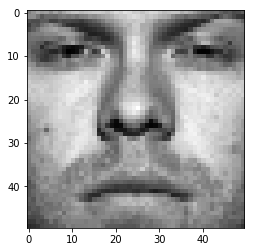

In [3]:
# Load training data
train_data, train_labels = load_data("train.txt")
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[2, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


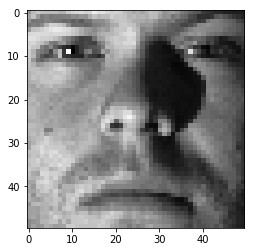

In [4]:
# Load testing data
test_data, test_labels = load_data("test.txt")
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## (c) Average face

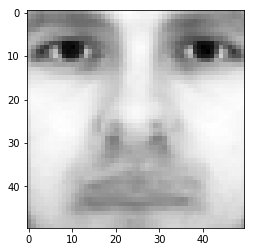

In [5]:
# Add up all the faces in training set
sum_face = np.sum(train_data, axis = 0)
average_face = sum_face/len(train_data)
# Plot out the face
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)

## (d) Mean Subtraction

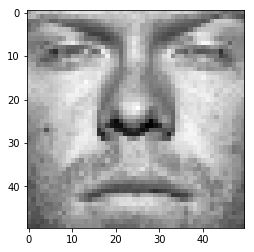

In [6]:
# Mean subtract of train dataset
mean_sub_train = train_data - average_face
# Plot out one of them, I plotted same one as I did in (b)
plt.imshow(mean_sub_train[2, :].reshape(50,50), cmap = cm.Greys_r)

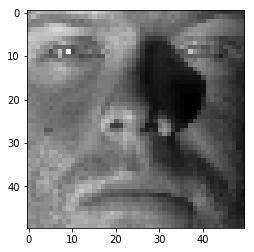

In [7]:
# Mean subtract of test dataset
mean_sub_test = test_data - average_face
# Plot out one of them, I plotted same one as I did in (b)
plt.imshow(mean_sub_test[1, :].reshape(50,50), cmap = cm.Greys_r)

## (e) Eigenface

In [8]:
# Use the built-in library function in numpy to find svd
u, s, v = np.linalg.svd(train_data, full_matrices = True)

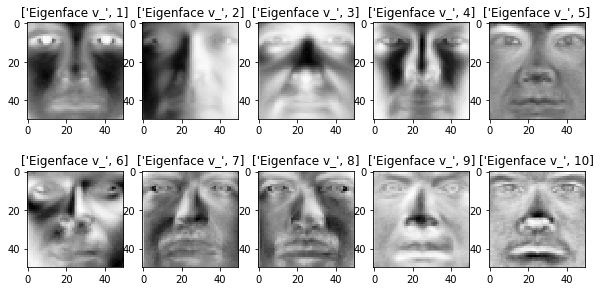

In [9]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    p = i + 1
    axes = fig.add_subplot(2,5,p)
    plt.imshow(v[i, :].reshape(50,50), cmap = cm.Greys_r)
    axes.title.set_text(["Eigenface v_", p])

## (f) Low-rank Approximation

In [10]:
def frobenius_norm(matrix_1, matrix_2):
    return sum(np.sqrt(sum((matrix_1 - matrix_2)**2)))

In [11]:
# Find prediction error for r = 1,2 ... 200
low_rank_error_list = []
for i in range(1,201):
    # Since s is not a matrix here, we are just going to take s[:i] instead of s[:i,:i] like the assignment suggested
    approx_rank_data = np.dot(u[:,:i] * s[:i], v[:i,:])
    low_rank_error_list.append(np.linalg.norm(train_data-approx_rank_data, ord = "fro"))

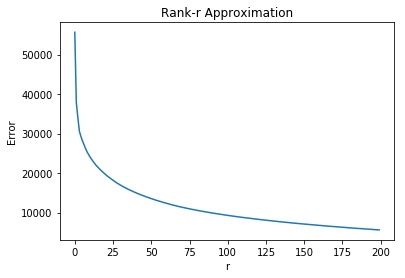

In [12]:
_ = plt.plot(low_rank_error_list)
_ = plt.title("Rank-r Approximation")
_ = plt.xlabel("r")
_ = plt.ylabel("Error")

## (g) Eigenface Feature

In [13]:
def r_dimensional_matrix(x, v_t, r):
    # Use the built-in library function in numpy to find svd
    #u_temp, s_temp, v_temp = np.linalg.svd(x, full_matrices = True)
    return np.dot(x, np.transpose(v_t[:r,:]))

## (h) Face Recognition

In [14]:
# Import this to clear output to show progress
from IPython.display import clear_output
# Importing logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='lbfgs', max_iter = 5000, multi_class = "ovr")

u_train, s_train, v_train = np.linalg.svd(train_data, full_matrices = True)
u_test, s_test, v_test = np.linalg.svd(test_data, full_matrices = True)

In [15]:
f_10 = r_dimensional_matrix(train_data, v_train, 10)
f_10_test = r_dimensional_matrix(test_data, v_train, 10)
lg.fit(f_10, train_labels)
pred_10_y = lg.predict(f_10_test)
print("The accuracy rate for r = 10 is", sum(pred_10_y == test_labels)/len(test_labels))

The accuracy rate for r = 10 is 0.83


In [16]:
accuracy_rate_list = []
for i in range(1, 201):
    lg = LogisticRegression(solver='lbfgs', max_iter = 5000, multi_class = "ovr")
    # Clear the output
    clear_output()
    print(round(i/200 * 100, 1), "% completed")
    # Print the accuracy rate
    if i > 1:
        print("r =", i,"Accuracy rate:", accuracy_rate_list[-1])
    f = r_dimensional_matrix(train_data, v_train, i)
    f_test = r_dimensional_matrix(test_data, v_train, i)
    lg.fit(f, train_labels)
    pred_y = lg.predict(f_test)
    accuracy_rate_list.append(sum(pred_y == test_labels)/len(test_labels))

100.0 % completed
r = 200 Accuracy rate: 0.95


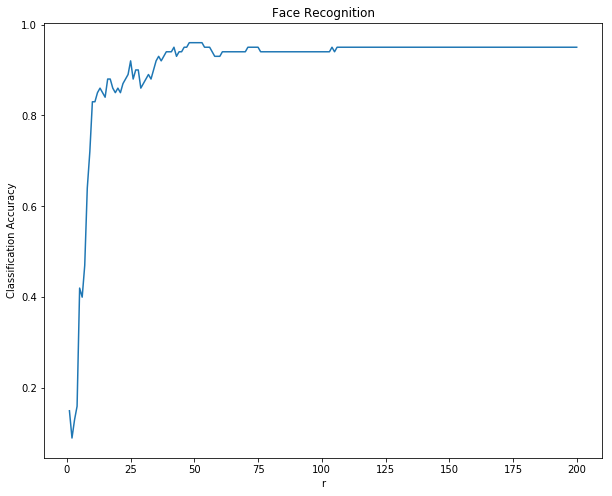

In [18]:
plt.figure(figsize=(10,8))
_ = plt.plot(np.arange(1,201), accuracy_rate_list)
_ = plt.title("Face Recognition")
_ = plt.xlabel("r")
_ = plt.ylabel("Classification Accuracy")